### Usando a Rede Neural Para Prever a Ocorrência de Câncer

In [21]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Carregando os Dados

https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

In [23]:
# Carregamos o objeto completo
temp = load_breast_cancer()

In [24]:
# Tipo do objeto
type(temp)

sklearn.utils.Bunch

In [25]:
# Visualiza o objeto
temp

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [26]:
# Carregamos o dataset
dados = pd.DataFrame(columns = load_breast_cancer()["feature_names"], data = load_breast_cancer()["data"])

In [27]:
# Shape
dados.shape

(569, 30)

In [28]:
# Visualiza os dados
dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# Verifica se temos valores ausentes
dados.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [30]:
# Separa a variável target
target = load_breast_cancer()["target"]

In [31]:
type(target)

numpy.ndarray

In [32]:
# Visualiza a variável
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
# Total de registros por classe - Câncer Benigno
np.count_nonzero(target == 1)

357

In [34]:
# Total de registros por classe - Câncer Maligno
np.count_nonzero(target == 0)

212

In [35]:
# Vamos extrair os labels

# Dicionário para os labels
labels = {}

# Nomes das classes da variável target
target_names = load_breast_cancer()["target_names"]

# Mapeamento
for i in range(len(target_names)):
    labels.update({i:target_names[i]})

In [36]:
# Visualiza os labels
labels

{0: 'malignant', 1: 'benign'}

In [37]:
# Agora preparamos as variáveis preditoras em X
X = np.array(dados)

In [38]:
# Visualiza os dados de entrada
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [39]:
# Dividimos os dados de entrada e saída em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, target, test_size = 0.15, shuffle = True)

In [40]:
# Shape dos dados de treino
print(X_treino.shape)
print(y_treino.shape)

(483, 30)
(483,)


In [41]:
# Shape dos dados de teste
print(X_teste.shape)
print(y_teste.shape)

(86, 30)
(86,)


In [42]:
# Ajusta o shape dos dados de entrada
X_treino = X_treino.T
X_teste = X_teste.T

In [43]:
print(X_treino.shape)
print(X_teste.shape)

(30, 483)
(30, 86)


In [44]:
# Precisamos ajustar também os dados de saída
y_treino = y_treino.reshape(1, len(y_treino))
y_teste = y_teste.reshape(1, len(y_teste))

In [45]:
print(y_treino.shape)
print(y_teste.shape)

(1, 483)
(1, 86)


In [46]:
# Variável com as dimensões de entrada para oo número de neurônios 
dims_camada_entrada = [X_treino.shape[0], 50, 20, 5, 1]

In [47]:
dims_camada_entrada

[30, 50, 20, 5, 1]

In [48]:
# Treinamento do modelo

print("\nIniciando o Treinamento.\n")

parametros, custo = modeloNN(X = X_treino, 
                             Y = y_treino, 
                             dims_camada_entrada = dims_camada_entrada, 
                             num_iterations = 3000, 
                             learning_rate = 0.0075)

print("\nTreinamento Concluído.\n")


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931476406502155
Custo Após 10 iterações é 0.691952058571055
Custo Após 20 iterações é 0.6908004648396447
Custo Após 30 iterações é 0.6896912557906087
Custo Após 40 iterações é 0.6886228386144225
Custo Após 50 iterações é 0.6875937091874144
Custo Após 60 iterações é 0.6866023979961501
Custo Após 70 iterações é 0.685647439703171
Custo Após 80 iterações é 0.6847275151985815
Custo Após 90 iterações é 0.6838416818239441
Custo Após 100 iterações é 0.6829886176189033
Custo Após 110 iterações é 0.6821668800750234
Custo Após 120 iterações é 0.6813752749822874
Custo Após 130 iterações é 0.680612675905404
Custo Após 140 iterações é 0.679877997441771
Custo Após 150 iterações é 0.6791701992715387
Custo Após 160 iterações é 0.6784882769293755
Custo Após 170 iterações é 0.6778312600186481
Custo Após 180 iterações é 0.6771982065391267
Custo Após 190 iterações é 0.6765882206082318
Custo Após 200 iterações é 0.6760004422088514
Custo Após 210 iteraçõ

Custo Após 1880 iterações é 0.26330742140940283
Custo Após 1890 iterações é 0.26111180305410997
Custo Após 1900 iterações é 0.2600071657337202
Custo Após 1910 iterações é 0.2615594606940393
Custo Após 1920 iterações é 0.2597973053297311
Custo Após 1930 iterações é 0.2582239453036231
Custo Após 1940 iterações é 0.2583219837825213
Custo Após 1950 iterações é 0.2560125093077447
Custo Após 1960 iterações é 0.2510825751504093
Custo Após 1970 iterações é 0.25180102408291194
Custo Após 1980 iterações é 0.2505372671225331
Custo Após 1990 iterações é 0.25000551528125997
Custo Após 2000 iterações é 0.25033395541590703
Custo Após 2010 iterações é 0.24976886124404288
Custo Após 2020 iterações é 0.247491970505273
Custo Após 2030 iterações é 0.24788389609877945
Custo Após 2040 iterações é 0.2469567136651066
Custo Após 2050 iterações é 0.2475631429772688
Custo Após 2060 iterações é 0.24782623391450975
Custo Após 2070 iterações é 0.24567576201901312
Custo Após 2080 iterações é 0.24355171043695376
Cust

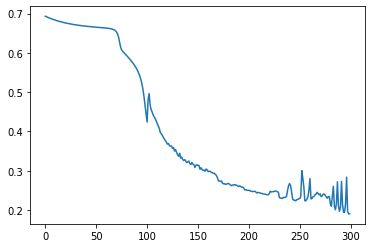

In [49]:
# Plot do erro durante o treinamento
plt.plot(custo)

In [50]:
# Previsões com os dados de treino
y_pred_treino = predict(X_treino, parametros)

In [51]:
# Visualiza as previsões
y_pred_treino

array([[1.07033507e-04, 9.10743181e-01, 8.12126367e-03, 9.61330707e-01,
        9.64133125e-01, 9.36331571e-01, 9.50283202e-01, 9.60114533e-01,
        9.52738986e-01, 9.70564987e-01, 3.23991384e-06, 9.53260556e-01,
        8.45117752e-03, 1.34440081e-08, 7.60250226e-01, 9.56897405e-01,
        1.09677466e-03, 9.47886768e-01, 2.83203787e-01, 9.51485155e-01,
        4.62617725e-02, 9.78291518e-01, 7.80271755e-03, 9.56966921e-01,
        9.44799679e-01, 1.42131544e-04, 1.79278265e-01, 9.26422264e-01,
        9.60472796e-01, 9.52170698e-01, 9.37462520e-01, 8.81372935e-01,
        6.78466090e-13, 7.98936887e-02, 2.23081812e-01, 9.65541983e-01,
        6.69544338e-01, 9.20896325e-01, 9.59986633e-01, 9.07978194e-01,
        9.60795619e-01, 9.56940366e-01, 2.84549111e-04, 9.40242937e-01,
        2.70232540e-08, 4.94800067e-01, 9.37888962e-01, 8.62166796e-01,
        9.41614331e-01, 9.02734863e-01, 5.36052325e-03, 2.50519366e-03,
        9.61667033e-01, 8.92080153e-01, 9.48678380e-05, 9.621969

In [52]:
# Ajustamos o shape em treino
y_pred_treino = y_pred_treino.reshape(-1)
y_treino = y_treino.reshape(-1)

In [53]:
y_pred_treino > 0.5

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False,

In [54]:
# Convertemos as previsões para o valor binário de classe 
# (0 ou 1, usando como threshold o valor de 0.5 da probabilidade)
y_pred_treino = 1 * (y_pred_treino > 0.5)

In [55]:
y_pred_treino

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [56]:
# Calculamos a acurácia comparando valor real com valor previsto
acc_treino = sum(1 * (y_pred_treino == y_treino)) / len(y_pred_treino) * 100

In [57]:
print("Acurácia nos dados de treino: " + str(acc_treino))

Acurácia nos dados de treino: 92.54658385093167


In [58]:
print(classification_report(y_treino, y_pred_treino, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.99      0.81      0.89       180
     Benigno       0.90      0.99      0.94       303

    accuracy                           0.93       483
   macro avg       0.94      0.90      0.92       483
weighted avg       0.93      0.93      0.92       483



In [59]:
# Previsões com o modelo usando dados de teste
y_pred_teste = predict(X_teste, parametros)

In [60]:
# Visualiza os dados
y_pred_teste

array([[9.67767501e-01, 9.60440539e-01, 9.19000337e-01, 9.47218979e-01,
        5.96433029e-01, 7.74220546e-01, 5.67083073e-11, 8.54958571e-01,
        1.37332383e-03, 9.74976483e-01, 9.54678491e-01, 9.62535119e-01,
        8.52426153e-07, 6.66755283e-04, 8.72467152e-01, 2.33715371e-01,
        9.67450142e-01, 9.65788699e-01, 9.58612208e-01, 9.60597058e-01,
        9.67422312e-01, 4.16514122e-02, 9.61881493e-01, 9.71167982e-01,
        9.55988592e-01, 9.69081276e-01, 9.48619340e-01, 9.66624710e-01,
        9.42186424e-01, 7.11507808e-01, 9.49818887e-01, 4.94890228e-04,
        4.13451880e-04, 8.94316428e-01, 9.48951848e-01, 5.93260927e-01,
        1.86345643e-01, 9.12255095e-01, 9.52872256e-01, 9.50865211e-01,
        9.34036664e-01, 9.50985992e-01, 9.42416527e-01, 9.67723023e-01,
        9.52904320e-01, 9.64248310e-01, 6.79476681e-01, 9.71621895e-01,
        9.64969335e-01, 3.73587367e-01, 5.79511451e-01, 9.18591318e-01,
        9.40137460e-01, 2.58079845e-01, 9.68465005e-01, 9.494944

In [61]:
# Ajustamos os shapes
y_pred_teste = y_pred_teste.reshape(-1)
y_teste = y_teste.reshape(-1)

In [62]:
# Convertemos as previsões para o valor binário de classe
y_pred_teste = 1 * (y_pred_teste > 0.5)

In [63]:
# Visualizamos as previsões
y_pred_teste

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [64]:
# Calculamos a acurácia
acuracia = sum(1 * (y_pred_teste == y_teste)) / len(y_pred_teste) * 100

In [65]:
print("Acurácia nos dados de teste: " + str(acuracia))

Acurácia nos dados de teste: 83.72093023255815


In [66]:
print(classification_report(y_teste, y_pred_teste, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.95      0.59      0.73        32
     Benigno       0.80      0.98      0.88        54

    accuracy                           0.84        86
   macro avg       0.88      0.79      0.81        86
weighted avg       0.86      0.84      0.83        86



# Fim